# BAND Function

\begin{equation*}
f_{\text{BAND}}(E) = 
\end{equation*}



\begin{equation}
A 
\begin{cases} 
	\left( \frac{E}{100 \text{ keV}} \right) ^\alpha \text{ exp} \left[ -\frac{ \left( \alpha + 2 \right) E}{E_{peak}} \right], \\ 
		\ \ \ \ \ \  \text{ for } E < \frac{(\alpha - \beta) E_{peak}}{\alpha + 2} \\
		\left( \frac{E}{100 \text{ keV}} \right) ^\beta \text{ exp} \left( \beta - \alpha \right) 
	\left[ \frac{ \left( \alpha - \beta \right) E_{peak}}{100 \text{ keV} (\alpha + 2)} \right] ^{\alpha - \beta} .\\
		\ \ \ \ \ \  \text{ for } E \geqslant \frac{(\alpha - \beta) E_{peak}}{\alpha + 2}  \\
\end{cases}
\end{equation}


This model has four free parameters: the amplitude A (photons s$^{-1}$ cm$^{-2}$ keV$^{-1}$), the low-energy index $\alpha$, the high-energy index $\beta$, and the peak in the $\nu F_{\nu}$ spectrum, $E_{peak}$ (keV).  

$E_{peak}$ and the e-folding energy used in XSPEC, $E_0$, are related by the following equation,
\begin{equation}
E_0 = \frac{E_{peak}}{(\alpha + 2)}.  
\end{equation}
The ``break energy" is related to the photon energy $E_{peak}$ of the peak of the $\nu F_{\nu}$ spectrum by
\begin{equation}
E_{break} = \frac{(\alpha - \beta ) E_{peak}}{(\alpha + 2)} = E_0(\alpha - \beta).
\end{equation}


These are the functions I use to calculate Eiso.

    a - alpha
    b - beta
    epk - epeak
    engs - energy array
    enrom is already set to 100.0 keV in these equations.

Simplify this even more by substituting single letter variables for the parameters.


y = $\left( \alpha - \beta \right)$ 

z = $E_0$ 

x = $E$ 

a = $\alpha$ 

b = $\beta$ 

remove the 100 keV normalization factor that will cause a hangup in sympy, but Wolfram Alpha can handle it.  You will add it back on by introducing a factor of (100^ -alpha) after the integration is complete.  

The factor of (1/100)^alpha, when included in the integration, returns  (100^ -alpha).  For the comptonized model, this will show up again.  Make sure to keep track of the signs. Depending on if alpha is - or + to start with, that will change your sign after integration.

Remove the normalization (or Amplitude), $A$.  This parameter is intruduced as a nuience parameter that accounts for effects due to the detector, background, etc.
We only care about the model.

\begin{equation*}
f_{\text{BAND}}(E) = 
\end{equation*}



\begin{equation}
\begin{cases} 
	 x ^a \ \text{ exp} \left( -\frac{x}{z} \right), \\ 
		\ \ \ \ \ \  \text{ for lower part}
        \\
        \\
		x ^b \ \text{ exp} \left( -y \right) 
	\ \left( y z \right) ^y .\\
		\ \ \ \ \ \  \text{ for upper part}   \\
\end{cases}
\end{equation}

\begin{equation*}
f_{\text{BAND}}(E) = 
\end{equation*}



\begin{equation}
\begin{cases} 
	 E ^\alpha \ \text{ exp} \left( -\frac{E}{E_0} \right), \\ 
		\ \ \ \ \ \  \text{ for lower part}
        \\
        \\
		E ^\beta \ \text{ exp} \left( - \left( \alpha - \beta \right) \right)
	\ \left( \left( \alpha - \beta \right) E_0 \right) ^{\left( \alpha - \beta \right)} .\\
		\ \ \ \ \ \  \text{ for upper part}   \\
\end{cases}
\end{equation}

## We used Wolfram Alpha to integrate the Band function to get $f_{\nu}$ and $\nu f_{\nu}$.  Sympy can also be used, but you would need to remove the factor of $\left( \frac{1}{100} \right)^{\alpha}$ and $\left( \frac{1}{100} \right)^{\beta}$ to get it to handle the integrations.

## Wolfram Alpha can handle them and so we used it to determine the integral for the Function when including the factor.

# Important Notes:

## Under NO circumstance should you assign variables (such as alpha, beta, efold, etc.) outside of their functions.  Any variable used in calculations within a funciton should remain unassigned in the main program.  It causes problems!

## Use a dictionary to assign parameter names and values to then pass to the functions.

## The - sign that I've had to enter (first part of band) or remove (second part of band) are due to the fact that the calculations are done by (lowIntegral - highIntegral).  The example from PyXspec did it this way, so I did as well.  If you assign the - and + correctly as Wolfram Alpha gives you, you can do (highIntegral - lowIntegral).

## emodel (or eufspec) and eemodel (or eeufspec) are the $f_{\nu}$ and $\nu f_{\nu}$, respectively. Both require the Band Function to be integrated wrt Energy.  The latter one requires you to multiply the Band Function by another factor of Energy before the integration.  This means, the Band Function is $E N(E)$ and $\nu f_{\nu}$ is then $E^2 N(E)$.  Integrating $f_{\nu}$ gives the Spectral Flux Density or (Energy Flux) and integrating $\nu f_{\nu}$ gives the Spectral Energy density we use in the Eiso calculation.  model (or ufspec) is the Band Function (BEFORE INTEGRATION), $N(E)$, and requires no information about the response matrix.

### Sidenote:  I call $\nu f_{\nu}$ "energy flux" in my Eiso calculations and $f_{\nu}$ "photon flux".

In [1]:
from __future__ import division
import numpy 
import matplotlib.pylab as plt
%matplotlib inline
import mpmath as mp
from collections import OrderedDict
import sympy as sy

In [2]:
params = OrderedDict()

params.update({'alpha':-1.0286698070834475})
params.update({'beta':-2.2003327469378235})
params.update({'efold':527.5755660475579})
params.update({'norm':0.01748869026041366})

energy_array = numpy.logspace(1, 8, 10000)

In [70]:
## CHECK THIS AGAINST THE N(E) PLOT.
## This is the model data from a fit and the plot 'model' in XSPEC.
# fA - an NaI
# fB - the BGO
# fC - the LAT detector
# all the models extend past the data range so they overlap just fine without LLE or the other NaI data..

import pandas as pd

direc = '/Users/KimiZ/GRBs2/analysis/LAT/bn080916009/PYXSPEC/GBMwLAT/grbm/'
F1 = direc+'s1_model_emodel_eemodel.txt'  # s1 - NaI data from n3 detector
F2 = direc+'s3_model_emodel_eemodel.txt'  # s3 - BGO data
F3 = direc+'s5_model_emodel_eemodel.txt'  # s5 - LAT data
f1 = numpy.loadtxt(F1, skiprows=1, delimiter=', ')
f2 = numpy.loadtxt(F2, skiprows=1, delimiter=', ')
f3 = numpy.loadtxt(F3, skiprows=1, delimiter=', ')
ff1 = pd.DataFrame(f1)  # ff1[]
ff2 = pd.DataFrame(f2)
ff3 = pd.DataFrame(f3)
# ff1[0] - energy
# ff1[2] - model (Plot in Xspec)
# ff1[3] - emodel (Plot in Xspec)
# ff1[4] - eemodel (Plot in Xspec)

Energy_Array_Dat = numpy.array(ff1[0][:]) # ENERGY ARRAY of s1 file. USED BY XSPEC as x-axis in plot.
# columns: ModelEnergy(keV)_Plot.x(i), ModelEnergyErr(keV)_Plot.xErr(i), 
#          model_Plot.model(i), emodel_Plot.model(i), eemodel_Plot.model(i)

### There is an issue with the $f_{\nu}$ and $\nu f_{\nu}$ plots lining up with the data.  I believe it to be a result of not having the response matrix in these calculations.  It should be a multiplicative offset to get them to line up with the data.

The data points plotted are calculated by D*(unfolded model)/(folded model), where D is the observed data, (unfolded model) is the theoretical model integrated over the plot bin, and (folded model) is the model times the response as seen in the standard plot data. 

The E used in the multiplicative factor is taken to be the geometric mean of the lower and upper energies of the plot bin.

folded = model * response (as seen in the standard plot data)
m1.values(1) * response

unfolded = theoretical model integrated over the plot bin.  What we end up with in Plot.model(1)

The offset for $f_{\nu}$ band_100keV is a factor of 0.27 or between .27 and .28 (0.26631905)
For $f_{\nu}$ band, between between 30 and 32. (30.39077972)

In [71]:
s1_en_diff = numpy.diff(ff1[0])
s1_emodel_diff =  numpy.diff(ff1[3])

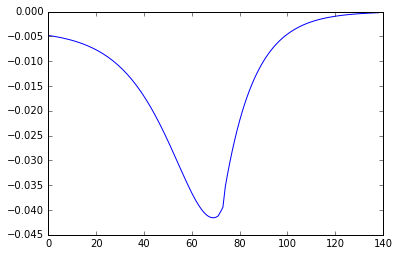

In [72]:
plt.plot(s1_emodel_diff)

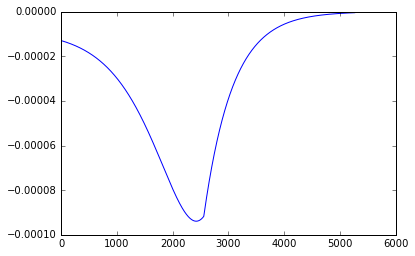

In [106]:
plt.plot(numpy.diff(my_model_1[:5264]))

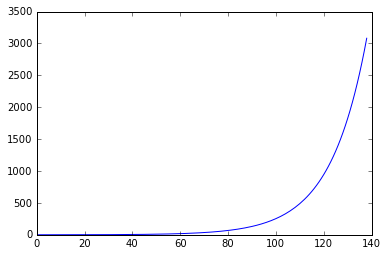

In [73]:
plt.plot(s1_en_diff)

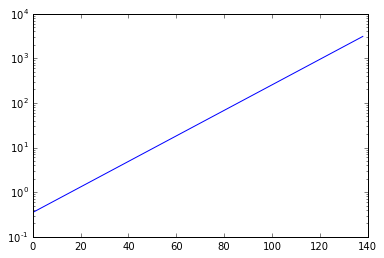

In [74]:
plt.plot(s1_en_diff)
plt.yscale('log')

In [16]:
# from scipy.stats.mstats import gmean

In [23]:
# gmean([ff1[0][0], ff1[0][1]])

In [107]:
energy_array[0:10]

array([ 10.        ,  10.01613271,  10.03229144,  10.04847624,
        10.06468715,  10.08092422,  10.09718748,  10.11347697,
        10.12979275,  10.14613485])

In [112]:
a = numpy.array(ff1[0])

In [113]:
a

array([  5.17000008e+00,   5.52156019e+00,   5.89703012e+00,
         6.29803491e+00,   6.72630501e+00,   7.18369508e+00,
         7.67218995e+00,   8.19390011e+00,   8.75108528e+00,
         9.34616518e+00,   9.98169518e+00,   1.06604500e+01,
         1.13853998e+01,   1.21595998e+01,   1.29864497e+01,
         1.38695498e+01,   1.48126497e+01,   1.58198996e+01,
         1.68956995e+01,   1.80446501e+01,   1.92716999e+01,
         2.05821495e+01,   2.19816999e+01,   2.34765005e+01,
         2.50729504e+01,   2.67778997e+01,   2.85987997e+01,
         3.05435495e+01,   3.26204996e+01,   3.48386993e+01,
         3.72077484e+01,   3.97378998e+01,   4.24401016e+01,
         4.53260002e+01,   4.84081993e+01,   5.17000008e+01,
         5.52156010e+01,   5.89703007e+01,   6.29803505e+01,
         6.72630501e+01,   7.18369484e+01,   7.67218475e+01,
         8.19389496e+01,   8.75108490e+01,   9.34616470e+01,
         9.98169479e+01,   1.06604500e+02,   1.13854000e+02,
         1.21596001e+02,

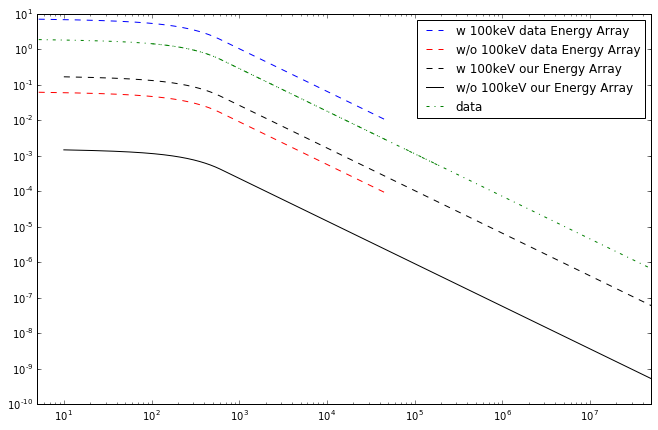

In [75]:
def Band_fnu_w100keV(Energy, **Pars):
    alpha = float(Pars['alpha'])
    beta = float(Pars['beta'])
    efold = float(Pars['efold']) # efolding energy
    norm = float(Pars['norm'])
    eng = numpy.array(Energy)

    flux = []
    for i in range(len(eng)-1):  
        if eng[i] < ((alpha-beta)*efold):
            multiplier = (-100.**-alpha) * efold**(alpha+1.) 
            lowIntegral = float(sy.uppergamma(alpha+1., eng[i]/efold ))
            highIntegral = float(sy.uppergamma(alpha+1., eng[i+1]/efold ))
            eqn = multiplier * (highIntegral - lowIntegral)
            flux.append(eqn)

        else:
            multiplier = ((100**-alpha) * ((alpha-beta)**(alpha-beta)) * numpy.exp(beta-alpha) * (efold**(alpha-beta))) * (1./(beta+1.))
            lowIntegral = (eng[i]**(beta+1.))
            highIntegral = (eng[i+1]**(beta+1.))
            eqn = multiplier * (highIntegral - lowIntegral)
            flux.append(eqn)
    return flux
    
    
    
    

def Band_fnu(Energy, **Pars):
    alpha = float(Pars['alpha'])
    beta = float(Pars['beta'])
    efold = float(Pars['efold']) # efolding energy
    norm = float(Pars['norm'])
    eng = numpy.array(Energy)

    flux = []
    for i in range(len(eng)-1):  
        if eng[i] < ((alpha-beta)*efold):
            multiplier = (efold**(alpha+1.))
            lowIntegral = float(sy.uppergamma(alpha+1., eng[i]/efold ))
            highIntegral = float(sy.uppergamma(alpha+1., eng[i+1]/efold ))
            eqn = multiplier * (lowIntegral - highIntegral)
            #eqn = multiplier * (highIntegral - lowIntegral)
            flux.append(eqn)
            
        else:
            multiplier = ((alpha-beta)**(alpha-beta) * -numpy.exp(beta-alpha) * (efold**(alpha-beta))) * (1./(beta+1.))
            lowIntegral = (eng[i]**(beta+1.))
            highIntegral = (eng[i+1]**(beta+1.))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
    return flux
    

plt.figure(figsize=(11,7))

plt.plot(Energy_Array_Dat[:-1],  Band_fnu_w100keV(Energy_Array_Dat, **params), 'b--', label='w 100keV data Energy Array')
plt.plot(Energy_Array_Dat[:-1],  Band_fnu(Energy_Array_Dat, **params), 'r--', label='w/o 100keV data Energy Array')

plt.plot(energy_array[:-1],  Band_fnu_w100keV(energy_array, **params), 'k--', label='w 100keV our Energy Array')
plt.plot(energy_array[:-1],  Band_fnu(energy_array, **params), 'k-', label='w/o 100keV our Energy Array')

# plotting xspec results for emodel.
plt.plot(ff1[0], ff1[3], '-.', color='green', label='data')
plt.legend(loc='best')
plt.plot(ff2[0], ff2[3], '-.', color='green')
plt.plot(ff3[0], ff3[3], '-.', color='green')


#plt.ylim(1E-7, 1)
plt.xlim(5, 5E+7)
plt.xscale('log')
plt.yscale('log')


In [76]:
my_model_1 = Band_fnu_w100keV(energy_array, **params)
my_model_2 = Band_fnu(energy_array, **params)

In [102]:
#ff1[-1] 48408.199219

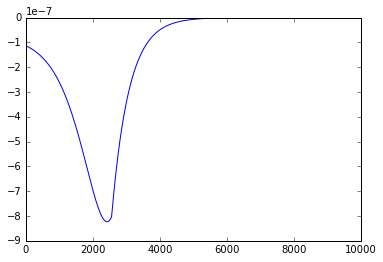

In [81]:
plt.plot(numpy.diff(my_model_2))

In [ ]:
energy_diff = numpy.diff(ff1[0]); energy_diff

In [ ]:
emodel_diff = numpy.diff(ff1[3]); emodel_diff

In [ ]:
plt.plot(numpy.diff(energy_array))

In [ ]:
plt.plot(energy_diff)

In [ ]:
plt.figure(figsize=(11,7))
plt.plot(numpy.diff(energy_array))
plt.minorticks_on()
plt.yscale('log')

In [ ]:
plt.plot(energy_diff)
plt.yscale('log')

In [ ]:
plt.plot(emodel_diff)

In [ ]:
plt.plot(emodel_diff/energy_diff)

## (lowIntegral - highIntegral) works as well if you switch a few - signs around.  I present this version because this is the setup the PyXspec example gave.  You need to add a - sign to the 2nd part and take away the - sign in the first part.  This example won't match the + and - signs that Wolfram Alpha gives you.

In [ ]:
def Band_fnu_w100keV_2(Energy, **Pars):
    alpha = float(Pars['alpha'])
    beta = float(Pars['beta'])
    efold = float(Pars['efold']) # efolding energy
    norm = float(Pars['norm'])
    eng = numpy.array(Energy)

    flux = []
    for i in range(len(eng)-1):  
        if eng[i] < ((alpha-beta)*efold):
            multiplier = (100.**-alpha) * efold**(alpha+1.) 
            lowIntegral = float(sy.uppergamma(alpha+1., eng[i]/efold ))
            highIntegral = float(sy.uppergamma(alpha+1., eng[i+1]/efold ))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)

        else:
            multiplier = ((100**-alpha) * (alpha-beta)**(alpha-beta) * -numpy.exp(beta-alpha) * (efold**(alpha-beta))) * (1./(beta+1.))
            lowIntegral = (eng[i]**(beta+1.))
            highIntegral = (eng[i+1]**(beta+1.))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)

    return flux
    
    
    
    

def Band_fnu_2(Energy, **Pars):
    alpha = float(Pars['alpha'])
    beta = float(Pars['beta'])
    efold = float(Pars['efold']) # efolding energy
    norm = float(Pars['norm'])
    eng = numpy.array(Energy)

    flux = []
    for i in range(len(eng)-1):  
        if eng[i] < ((alpha-beta)*efold):
            multiplier = efold**(alpha+1.)
            lowIntegral = float(sy.uppergamma(alpha+1., eng[i]/efold ))
            highIntegral = float(sy.uppergamma(alpha+1., eng[i+1]/efold ))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)

        else:
            multiplier = ((alpha-beta)**(alpha-beta) * -numpy.exp(beta-alpha) * (efold**(alpha-beta))) * (1./(beta+1.))
            lowIntegral = (eng[i]**(beta+1.))
            highIntegral = (eng[i+1]**(beta+1.))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
            
    return flux
    

plt.figure(figsize=(11,7))
plt.plot(energy_array[:-1],  Band_fnu_2(energy_array, **params), 'r-')
plt.plot(energy_array[:-1],  Band_fnu_w100keV_2(energy_array, **params), 'b-')

# plotting xspec results for emodel.
plt.plot(ff1[0], ff1[3], '-.', color='green')
plt.plot(ff2[0], ff2[3], '-.', color='green')
plt.plot(ff3[0], ff3[3], '-.', color='green')


#plt.ylim(1E-7, 1)
plt.xlim(5, 5E+7)
plt.xscale('log')
plt.yscale('log')

## Adding in the normalization 

In [ ]:
def band_100keV(Energy, **Pars):
    alpha = float(Pars['alpha'])
    beta = float(Pars['beta'])
    efold = float(Pars['efold']) # efolding energy
    norm = float(Pars['norm'])
    eng = numpy.array(Energy)
    #flux = numpy.zeros(len(eng))

    flux = []
    for i in range(len(eng)-1):  
        if eng[i] < ((alpha-beta)*efold):
            multiplier = norm*(100.**-alpha) * efold**(alpha+1.) 
            lowIntegral = float(sy.uppergamma(alpha+1., eng[i]/efold ))
            highIntegral = float(sy.uppergamma(alpha+1., eng[i+1]/efold ))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
            #flux[i] = eqn
            #print flux[i]
        else:
            multiplier = norm*((100**-alpha) * (alpha-beta)**(alpha-beta) * -numpy.exp(beta-alpha) * (efold**(alpha-beta))) * (1./(beta+1.))
            lowIntegral = (eng[i]**(beta+1.))
            highIntegral = (eng[i+1]**(beta+1.))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
            #flux[i] = eqn
            #print flux[i]
            #eqn = ((100**-alpha) * (alpha-beta)**(alpha-beta) * -1*numpy.exp(beta-alpha) * eng**(beta+1.) * efold**(alpha-beta)) * (1./(beta+1.))
            #return eqn
    return flux
    
    
    
    

def band(Energy, **Pars):
    alpha = float(Pars['alpha'])
    beta = float(Pars['beta'])
    efold = float(Pars['efold']) # efolding energy
    norm = float(Pars['norm'])
    eng = numpy.array(Energy)
    #flux = numpy.zeros(len(eng))

    flux = []
    for i in range(len(eng)-1):  
        if eng[i] < ((alpha-beta)*efold):
            multiplier = norm*(efold**(alpha+1.))
            lowIntegral = float(sy.uppergamma(alpha+1., eng[i]/efold ))
            highIntegral = float(sy.uppergamma(alpha+1., eng[i+1]/efold ))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
            #flux[i] = eqn
            #print flux[i]
        else:
            multiplier = norm * ((alpha-beta)**(alpha-beta) * -numpy.exp(beta-alpha) * (efold**(alpha-beta))) * (1./(beta+1.))
            lowIntegral = (eng[i]**(beta+1.))
            highIntegral = (eng[i+1]**(beta+1.))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
            #flux[i] = eqn
            #print flux[i]
            #eqn = ((100**-alpha) * (alpha-beta)**(alpha-beta) * -1*numpy.exp(beta-alpha) * eng**(beta+1.) * efold**(alpha-beta)) * (1./(beta+1.))
            #return eqn
    return flux
    

plt.figure(figsize=(11,7))
plt.plot(energy_array[:-1],  band(energy_array, **params), 'r-')
plt.plot(energy_array[:-1],  band_100keV(energy_array, **params), 'b-')
#plt.ylim(1E-7, 1)
plt.xlim(5, 5E+7)
plt.xscale('log')
plt.yscale('log')

def band(Energy, params):
    engs = float(Energy)
    a = float(params[0]) # alpha: low-energy index
    b = float(params[1]) # beta: high-energy index
    efold = float(params[2]) # e-folding energy, E_0
    a=alpha
    b=beta
    efold = efolding

    if engs < ((a - b) * efold):
        #eqn = ((100.**(-a)) * (efold**(a+1.))) * (float(mp.gammainc(a + 1., a=engs/efold)))
        eqn = (100.**-a) * efold * (engs**a) * ((engs/efold)**-a) * (float(mp.gammainc(a + 1., a=engs/efold)))

    else:
        eqn = (100.**-a) * -math.exp(b-a) * (engs**(b+1.)) * ((efold*(a-b))**(a-b)) * (1./(b+1.))
    return eqn

In [ ]:
# This is the form that Wolfram alpha spits out, assuming that alpha, energy and efold are all positive.
def band1(Energy, **Pars):
    alpha = float(Pars['alpha'])
    beta = float(Pars['beta'])
    efold = float(Pars['efold']) # efolding energy
    norm = float(Pars['norm'])
    eng = numpy.array(Energy)
    #flux = numpy.zeros(len(eng))

    flux = []
    for i in range(len(eng)-1):  
        if eng[i] < ((alpha-beta)*efold):
            multiplier = efold**(alpha+1.)
            lowIntegral = float(sy.uppergamma(alpha+1., eng[i]/efold ))
            highIntegral = float(sy.uppergamma(alpha+1., eng[i+1]/efold ))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
            #flux[i] = eqn
            #print flux[i]
        else:
            multiplier = ((alpha-beta)**(alpha-beta) * -numpy.exp(beta-alpha) * (efold**(alpha-beta))) * (1./(beta+1.))
            lowIntegral = (eng[i]**(beta+1.))
            highIntegral = (eng[i+1]**(beta+1.))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
            #flux[i] = eqn
            #print flux[i]
            #eqn = ((100**-alpha) * (alpha-beta)**(alpha-beta) * -1*numpy.exp(beta-alpha) * eng**(beta+1.) * efold**(alpha-beta)) * (1./(beta+1.))
            #return eqn
    return flux
    

In [ ]:
# This is the one I just changed to the aternative first part of band fn.  
# This is the first option Wolfram Alpha shoots out and makes no assumptions 
# of positives for alpha, energy and efold.
def band2(Energy, **Pars):
    alpha = float(Pars['alpha'])
    beta = float(Pars['beta'])
    efold = float(Pars['efold']) # efolding energy
    norm = float(Pars['norm'])
    eng = numpy.array(Energy)
    #flux = numpy.zeros(len(eng))

    flux = []
    for i in range(len(eng)-1):  
        if eng[i] < ((alpha-beta)*efold):
            #multiplier = efold**(alpha+1.)
            multiplier = efold 
            lowIntegral = (eng[i]**alpha) * ((eng[i]/efold)**-alpha) * float(sy.uppergamma(alpha+1., eng[i]/efold ))
            highIntegral = (eng[i+1]**alpha) * ((eng[i+1]/efold)**-alpha) * float(sy.uppergamma(alpha+1., eng[i+1]/efold ))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
            #flux[i] = eqn
            #print flux[i]
        else:
            multiplier = ((alpha-beta)**(alpha-beta) * -numpy.exp(beta-alpha) * (efold**(alpha-beta))) * (1./(beta+1.))
            lowIntegral = (eng[i]**(beta+1.))
            highIntegral = (eng[i+1]**(beta+1.))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
            #flux[i] = eqn
            #print flux[i]
            #eqn = ((100**-alpha) * (alpha-beta)**(alpha-beta) * -1*numpy.exp(beta-alpha) * eng**(beta+1.) * efold**(alpha-beta)) * (1./(beta+1.))
            #return eqn
    return flux
    

In [ ]:
plt.plot(energy_array[:-1],  band1(energy_array, **params), 'r-')
plt.plot(energy_array[:-1],  band2(energy_array, **params), 'b--')
#plt.ylim(1E-7, 1)
plt.xlim(5, 5E+7)
plt.xscale('log')
plt.yscale('log')

# $\nu F_{\nu}$

## These next two are $\nu F_{\nu}$.
You take the Band function, multiply it by another factor of energy and integrate it.  

In [ ]:
# This is the form that Wolfram alpha spits out, assuming that alpha, energy, and efold are all positive.
# This is usually the last one Wolfram Alpha spits out as an answer.
def band1(Energy, **Pars):
    alpha = float(Pars['alpha'])
    beta = float(Pars['beta'])
    efold = float(Pars['efold']) # efolding energy
    norm = float(Pars['norm'])
    eng = numpy.array(Energy)

    flux = []
    for i in range(len(eng)-1):  
        if eng[i] < ((alpha-beta)*efold):
            multiplier = efold**(alpha+2.)
            lowIntegral = float(sy.uppergamma(alpha+2., eng[i]/efold ))
            highIntegral = float(sy.uppergamma(alpha+2., eng[i+1]/efold ))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
            #flux[i] = eqn
            #print flux[i]
        else:
            multiplier = ((alpha-beta)**(alpha-beta) * -numpy.exp(beta-alpha) * (efold**(alpha-beta))) * (1./(beta+2.))
            lowIntegral = (eng[i]**(beta+2.))
            highIntegral = (eng[i+1]**(beta+2.))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
    return flux
    

# This option is the first Wolfram Alpha spits out.  It makes no assumtions of positive parameters.
# I only changed the first part of the Band fn.  You can check that the 2nd part is also consistent between
# Wolfram solutions by doing some basic algebra.
def band2(Energy, **Pars):
    alpha = float(Pars['alpha'])
    beta = float(Pars['beta'])
    efold = float(Pars['efold']) # efolding energy
    norm = float(Pars['norm'])
    eng = numpy.array(Energy)

    flux = []
    for i in range(len(eng)-1):  
        if eng[i] < ((alpha-beta)*efold):
            multiplier = (efold**2)
            lowIntegral = (eng[i]**alpha) * ((eng[i]/efold)**-alpha) * float(sy.uppergamma(alpha+2., eng[i]/efold ))
            highIntegral = (eng[i+1]**alpha) * ((eng[i+1]/efold)**-alpha) * float(sy.uppergamma(alpha+2., eng[i+1]/efold ))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
        else:
            multiplier = ((alpha-beta)**(alpha-beta) * -numpy.exp(beta-alpha) * (efold**(alpha-beta))) * (1./(beta+2.))
            lowIntegral = (eng[i]**(beta+2.))
            highIntegral = (eng[i+1]**(beta+2.))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
    return flux
    

plt.plot(energy_array[:-1],  band1(energy_array, **params), 'r-')
plt.plot(energy_array[:-1],  band2(energy_array, **params), 'b--')

#plt.ylim(1E-7, 1)
plt.xlim(5, 5E+7)
plt.xscale('log')
plt.yscale('log')

In [ ]:
# This is the form that Wolfram alpha spits out, assuming that alpha, energy, and efold are all positive.
# This is usually the last one Wolfram Alpha spits out as an answer.
def band1(Energy, **Pars):
    alpha = float(Pars['alpha'])
    beta = float(Pars['beta'])
    efold = float(Pars['efold']) # efolding energy
    norm = float(Pars['norm'])
    eng = numpy.array(Energy)

    flux = []
    for i in range(len(eng)-1):  
        if eng[i] < ((alpha-beta)*efold):
            multiplier = efold**(alpha+2.)
            lowIntegral = float(sy.uppergamma(alpha+2., eng[i]/efold ))
            highIntegral = float(sy.uppergamma(alpha+2., eng[i+1]/efold ))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
            #flux[i] = eqn
            #print flux[i]
        else:
            multiplier = ((alpha-beta)**(alpha-beta) * -numpy.exp(beta-alpha) * (efold**(alpha-beta))) * (1./(beta+2.))
            lowIntegral = (eng[i]**(beta+2.))
            highIntegral = (eng[i+1]**(beta+2.))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
    return flux
plt.plot(energy_array[:-1],  band2(energy_array, **params), 'b--')

#plt.ylim(1E-7, 1)
plt.xlim(5, 5E+7)
plt.xscale('log')
plt.yscale('log')  

In [ ]:
# plotting xspec results for emodel.
plt.plot(ff1[0], ff1[3], '-.', color='green')
plt.plot(ff2[0], ff2[3], '-.', color='green')
plt.plot(ff3[0], ff3[3], '-.', color='green')

### Testing if we change the negative signs to what Wolfram Alpha gives, and swapping (lowIntegral - highIntegral) to (highIntegral-lowIntegral) to see if it is consistent, and it is.

In [ ]:
# This is the form that Wolfram alpha spits out where we assume all parameters are positive.  
# It's the same as all the rest it spits out.

def band1(Energy, **Pars):
    alpha = float(Pars['alpha'])
    beta = float(Pars['beta'])
    efold = float(Pars['efold']) # efolding energy
    norm = float(Pars['norm'])
    eng = numpy.array(Energy)

    flux = []
    for i in range(len(eng)-1):  
        if eng[i] < ((alpha-beta)*efold):
            multiplier = efold**(alpha+2.)
            lowIntegral = float(sy.uppergamma(alpha+2., eng[i]/efold ))
            highIntegral = float(sy.uppergamma(alpha+2., eng[i+1]/efold ))
            eqn = -multiplier * (highIntegral - lowIntegral)
            flux.append(eqn)

        else:
            multiplier = ((alpha-beta)**(alpha-beta) * numpy.exp(beta-alpha) * (efold**(alpha-beta))) * (1./(beta+2.))
            lowIntegral = (eng[i]**(beta+2.))
            highIntegral = (eng[i+1]**(beta+2.))
            eqn = multiplier * (highIntegral - lowIntegral)
            flux.append(eqn)
    return flux



# This is the one I just changed to the aternative first part of band fn.  
# This is the first option Wolfram Alpha shoots out and makes no assumptions 
# of positives for alpha, energy and efold.
def band2(Energy, **Pars):
    alpha = float(Pars['alpha'])
    beta = float(Pars['beta'])
    efold = float(Pars['efold']) # efolding energy
    norm = float(Pars['norm'])
    eng = numpy.array(Energy)

    flux = []
    for i in range(len(eng)-1):  
        if eng[i] < ((alpha-beta)*efold):
            multiplier = (efold**2)
            lowIntegral = (eng[i]**alpha) * ((eng[i]/efold)**-alpha) * float(sy.uppergamma(alpha+2., eng[i]/efold ))
            highIntegral = (eng[i+1]**alpha) * ((eng[i+1]/efold)**-alpha) * float(sy.uppergamma(alpha+2., eng[i+1]/efold ))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
        else:
            multiplier = ((alpha-beta)**(alpha-beta) * -numpy.exp(beta-alpha) * (efold**(alpha-beta))) * (1./(beta+2.))
            lowIntegral = (eng[i]**(beta+2.))
            highIntegral = (eng[i+1]**(beta+2.))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux.append(eqn)
    return flux

plt.figure(figsize=(11,7))
plt.plot(energy_array[:-1],  band1(energy_array, **params), 'r-')
plt.plot(energy_array[:-1],  band2(energy_array, **params), 'b--')
#plt.ylim(1E-7, 1)
plt.xlim(5, 5E+7)
plt.xscale('log')
plt.yscale('log')

# N(E) or model plot

#### epeak = efold \* (alpha+2)
#### ebreak = efold \* (alpha - beta) = ((alpha-beta) \* epeak) / (alpha+2.)

### Because there is no integration for this one, we don't have to worry about correct - + signs.  That only arrises during the integration.

In [ ]:
# This version of the band function is N(E), the Photon Flux Density, or known as model out of model, emodel, and eemodel.
# This version 
def bandB(Energy, **Pars):
    alpha = round(float(Pars['alpha']), 5)
    beta = round(float(Pars['beta']), 5)
    efold = round(float(Pars['efold']), 5) # efolding energy
    norm = round(float(Pars['norm']), 5)
    eng = float(Energy)

    eqn = []
    if eng <= ((alpha-beta)*efold):
        eqn = norm*((1./100.)**(alpha))*(eng**alpha)*(numpy.exp(-(eng/efold)))
        return eqn

    else:
        eqn = norm*((1./100.)**(alpha))*((eng**beta) * numpy.exp(-(alpha-beta)) * (((alpha-beta)*efold)**(alpha-beta)))
        return eqn

plt.figure(figsize=(11,7))
for i in energy_array:
    plt.plot(i,  bandB(i, **params), marker='.', markersize=2,  color='red')
plt.plot(ff1[0], ff1[2], '-.', color='green')
plt.plot(ff2[0], ff2[2], '-.', color='green')
plt.plot(ff3[0], ff3[2], '-.', color='green')

#plt.ylim(1E-13, 1E-12)
plt.xlim(5, 5E+7)
plt.xscale('log')
plt.yscale('log')

def band(Energy, flux, **Pars):
    alpha = float(Pars['alpha'])
    beta = float(Pars['beta'])
    efold = float(Pars['efold']) # efolding energy
    norm = float(Pars['norm'])
    eng = numpy.array(Energy)
    flux = numpy.zeros(len(eng))


    for i in range(len(eng)-1):  
        if eng[i] < ((alpha-beta)*efold):
            multiplier = (100**-alpha) * efold**(alpha+1.) 
            lowIntegral = float(mp.gammainc(alpha+1., eng[i]/efold ))
            highIntegral = float(mp.gammainc(alpha+1., eng[i+1]/efold ))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux[i] = eqn
        else:
            multiplier = ((100**-alpha) * (alpha-beta)**(alpha-beta) * -numpy.exp(beta-alpha) * (efold**(alpha-beta))) * (1./(beta+1.))
            lowIntegral = (eng[i]**(beta+1.))
            highIntegral = (eng[i+1]**(beta+1.))
            eqn = multiplier * (lowIntegral - highIntegral)
            flux[i] = eqn
            #eqn = ((100**-alpha) * (alpha-beta)**(alpha-beta) * -1*numpy.exp(beta-alpha) * eng**(beta+1.) * efold**(alpha-beta)) * (1./(beta+1.))
            #return eqn
        return flux
    